# Classical Statistical Inference: Part 1

## Table of Content:

- I. [Basic probability concepts](#I)    
    * I.1 [Probability axioms](#I.1-Probability-axioms)
    * I.2 [What is a conditional probability and what is the Bayes theorem ?](#I.2-What-is-a-conditional-probability-and-what-is-the-Bayes-theorem-?)
    * I.3 [What is a random variable ?](#I.3-What-is-a-random-variable-?)
    * I.4 [What is a probability density function ?](#pdf)
    * I.4b [pdf, conditional probability and Bayes rule](#bayes)
    * I.5 [What is a cumulative density function ?](#I.5-What-is-a-cumulative-density-function-?)
    * I.6 [Working with pdf and CDF](Basic-statistics_02.ipynb)

- X. [References and supplementary material](#X)

In [1]:
# Modules to be used in this notebook
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

## I Basic (probability) concepts:  <a class="anchor" id="I"></a>

First of all, let's remind us some definitions and notations, so everybody is on the same page. 

In probability theory, we define the following:
- the set of all possible outcomes of an experiment is generally called **sample space** and denoted, $\Omega$. 
- Points in $\Omega$, are called **realisations** $\omega$. 
- An **Event** is a subset of $\Omega$ (i.e. a subsample of the $\omega$).
- $p(A)$ is the **probability** of an event A. ($p(A)$ can also refer to a probability that a value of $x$ falls in a d$x$ wide interval around $x$. )

**Example**: We measure the magnitude $m$ of a variable star. Then $\Omega = {\rm I\!R}$ (or some plausible range such as $]-30, 40 [ $, but this makes little difference in practice and $\Omega$ can in general be larger than needed). $\omega$ is a value in $\Omega$. While an event is the ensemble of magnitude measurements that are e.g. such that $m_i > 15$ and $m_i <=15.5$, hence this *event* is A = ]15, 15.5]. Note that an event *can* also be a single point (i.e. A = [17.]). 

If you are confortable with your understanding of basic probability concepts, you can go directly to [Sect. I.3](#I.3-What-is-a-random-variable-?). Otherwise, the next sections are there to refresh your mind. 

### I.1 Probability axioms

To qualify as a probability, $p(A)$ must satisfy the three following axioms (also called [Kolmogorov](https://fr.wikipedia.org/wiki/Andre%C3%AF_Kolmogorov) axioms).

1. $p(A) > 0$ for each A. 
2. $p(\Omega) = 1$
3. If ($A_1, A_2, A_3, ...$ are disjoint events), then   
$$
p\left(\bigcup_{i=1}^{\infty} {A_i}\right) = \sum_{i=1}^{\infty} p(A_i), 
$$
where $\cup$ stands for **union**. 

As a consequence of these axioms, several useful rules can be derived. 

#### The *sum rule*:

$$
p(A \cup B) = p(A) + p(B)-p(A \cap B)
$$

where $\cap$ stands for **intersection**. Note that in some stats books, you may see $p(A \cap B)$ written $p(AB)$. 

This sum rule, avoids double counting the intersection when calculating the probability the *both* A and B happen (i.e. $A \cup B$) as illustrated on the figure below (based on Fig. 3.1. of our reference [book](#book)). 

#### Illustration of the *sum rule*: 
![From astroML book](Figures/Sum_of_probabilities_2.png)

#### Law of total probability: 

If events $B_i$ ($i=$1, 2, ... N) are *disjoint*, and their *union* is the set of all possible outcomes (i.e. $p(\cup_{i=1}^N B_i) = 1$) then:

$$
p(A) = \sum_i p(A\,\cap\,B_i) = \sum_i p(A \,|\, B_i)~p(B_i)
$$

This expression is known as the **law of total probability**. 

#### Conditional probability and law of total probability: 

Conditional probabilities also satisfy the law of total probability. Assuming that an event C is not mutually exclusive with A, or any B_i, then:   

$$
p(A \, | \, C) = \sum_i p(A \,|\,C \,\cap \, B_i)~p(B_i \,| C)
$$

We'll come back to conditional probabilities later.

**Note:** Those probability axioms and lemma are accepted by both frequentist and bayesian statisticians. The difference between those "two schools" come from the *interpretation* of probabilities of an event A, and of conditional probabilities.

### I.2 What is a conditional probability and what is the Bayes theorem ? 

#### Definition: 

Assuming that $p(B) > 0$, the **conditional probability** of A *given* B (that we write $p(A \, | \, B)$ ), is defined as: 

$$
p(A \, | \, B) = \frac{p(A \, \cap \, B)}{p(B)}
$$

In other words, the conditional probability of A *given* B is **the fraction of the times A occurs when B occurs**. 

If A and B are independent events, $p(A \cap B)$ seen as the probability that *both* A and B will happen, is equal to:    
$$
p(A \cap B) = p(A \,|\, B)~ p(B) = p(B \,|\, A)~ p(A).
$$

Having "A given B" means that we consider events A given that B is True.

As we see here, *in general*  $p(A \, | \, B) \ne p(B \, | \, A)$. The probability to have feaver given you have a flu is close to 1, but the probability you have a flu given you have fever is surely lower than 1 !  

One can re-write the above expression the following way:

$$
p(A\,|\,B) = \frac{p(B\,|\,A) \, p(A)}{p(B)}
$$

This expression, devised by reverand Bayes during the 16th century, what is called the **Bayes theorem**.   
Note that we can see A as some observation and B as some model parameters ... We'll discuss this idea in a future lecture. 

### I.3 What is a random variable ?

In statistical inference, we are dealing with *data*. How do we link *sample space* and *events* to data ? The link is the concept of of *random* (or *stochastic*) variable.  

#### Definition: 

Mathematically, a random variable is a *mapping* 
$$
X: \Omega \to {\rm I\!R}
$$
that assigns a real number $X(\omega_i)~$ to each outcome $\omega$. 

A less formal definition is simply that a random variable is a variable whose value results from the measurement of a quantity that is subject to random variations. 

**Example:** You roll a dice. You can then define $X(\omega)$ be the *number of times you draw an even number* in a sequence $\omega$. Imagine you have rolled your dice 10 times, and get  $\omega = {1, {\bf 2, 4, 2}, 5, {\bf 4, 6}, 3, 3, 1 }$. Then $X(\omega) = 5$ is the value taken by your *random variable* X. 

Note that you can have either *continuous* or *discrete* random variables. If they form a countable set, they are discrete. They are continuous otherwise. 

**Warning**, a random variable is *NOT* like typical mathematical variables as it can take *different values* (each with an associated probability). In litterature, you will generaly find random variables written with *CAPITAL* letters, and their particular *realization* with *lowercase*. A realisation of a random variable is also called "random variate". 

**Random variable with numpy**

In numpy there is a sub-module called random that contains many functions that involve random selection. In particular there is a function `choice` that allows you to make a choice at random. It picks one item at random from an array, and it is equally likely to pick any of the items. The function call is `np.random.choice(array_name)`, where `array_name` is the name of the array from which to make the choice.

In [2]:
# Let's build a small array with classification of objects on a CCD: 
class_phot = np.array(['star', 'galaxy', 'galaxy', 'star', 'star'])
np.random.choice(class_phot)

'galaxy'

In [14]:
np.random.choice(class_phot)

'star'

If you re-rerun the above cell multiple times, you will see that the output changes, because the output is taken at random. If you provide a second argument (`size = n`), it will repeat the process $n$ number of times. In practice, this `method` allows you to *generate a random sample* from a 1-D array. You can add a third argument that specifies if you allow replacements or not as the output: i.e. `replace=False` means that the value stored at a given index of the array will only appear once in the output. 

In [15]:
np.random.choice(class_phot, size=3)    

array(['galaxy', 'galaxy', 'star'], dtype='<U6')

In [47]:
# Use e.g. np.arange(5) to compare the behaviour with replace=True / replace = False
x = np.arange(5)
np.random.choice(x, size=3,replace = False)#each element just randomly appears once 

array([3, 4, 1])

In [ ]:
#Try out with an array size < size of the random sample 


In [54]:
# If size > size(a), you cannot generate a random sample with choice and replace=False (it does not make sense)
np.random.choice(x, size=5,replace = False)

array([4, 2, 1, 3, 0])

Other important methods of `np.random` are:
- `np.random.seed(value)`: Set the seed of the random number generator (allows to get reproductible results)
- `np.random.rand(shape)`: generate an array populated with random floats drawn from an uniform distribution. 
- `np.random.randint(low, high, shape)`: generate an array of random integers between `low` and `high` values. 
- `np.random.permutation(array_name)`: return a copy of the original array with elements permuted along the first axis of the array. 

**Exercise**

Create a 2D array of 10 rows and 7 columns (with random integer values). 
- (1) Use `choice` to select at random 5 different rows. 
- (2) Use `choice` to select at random 3 different columns.
- (3) Create an 1-D array representing result of 1000 coin toss (set value `0` for head and `1` for tail using random integers generator). Plot the histogram of their values (using `matplotlib.pyplot.hist`; Note that you can set the number of bins by setting the argument `bins = value`). Set the argument `density` of `hist()` to values True and False. What is the difference of behaviour ? 
- (4) Permute the rows of your 2d array and compare with the original. Permute (=shuffle) the elements of the first row of your original array.  
- (5) Fix the seed of your random generator. Create an array `a` of 10 integers between 0 and 10. Redo this operation and save it into an array `b`. Compare `a` and `b`. How should you proceed to have 2 identical arrays ? 

In [58]:
# Create a 2D array 
import numpy.random as rnd

In [71]:
TD_array = rnd.randint(0,100,(10,7))
TD_array

array([[47, 94, 82, 65, 19, 15, 80],
       [48, 16, 35, 96, 82,  7, 68],
       [67, 69, 60, 89, 84, 85, 97],
       [29, 14, 62, 41, 46, 32,  4],
       [49, 55, 58, 18, 24, 49, 44],
       [88, 85, 49, 24, 20, 13, 93],
       [27, 67, 14, 46, 33, 81, 45],
       [46, 85, 23, 50, 51,  5, 11],
       [ 2, 48, 22, 14,  5, 79, 65],
       [92, 94, 48, 80, 58, 72,  9]])

In [81]:
# Select at random 5 different rows
n=rnd.choice(np.arange(10),size=5,replace=False)
print(n)

[4 3 2 9 8]


In [85]:
TD_array[n,:]

array([[49, 55, 58, 18, 24, 49, 44],
       [29, 14, 62, 41, 46, 32,  4],
       [67, 69, 60, 89, 84, 85, 97],
       [92, 94, 48, 80, 58, 72,  9],
       [ 2, 48, 22, 14,  5, 79, 65]])

In [86]:
# Select 3 columns ids
c=rnd.choice(np.arange(7),size=3,replace=False)

In [94]:
# (3) 1D array representing 1000 coin toss and histogram.
coin_array = rnd.randint(0,2,1000)
coin_array.shape

(1000,)

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
coin_array

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,

(array([501.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 499.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

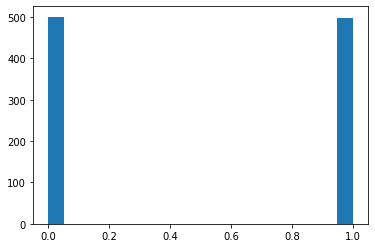

In [100]:
plt.hist(coin_array,bins=20)

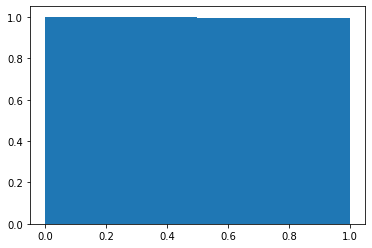

In [208]:
myhist_values = plt.hist(coin_array,bins=2,density=2)
#myhist_values

In [164]:
# (4) Permutions of the rows of my 2d array
rnd.permutation(TD_array[1,:])

array([ 7, 16, 96, 68, 48, 35, 82])

In [113]:
TD_array

array([[47, 94, 82, 65, 19, 15, 80],
       [48, 16, 35, 96, 82,  7, 68],
       [67, 69, 60, 89, 84, 85, 97],
       [29, 14, 62, 41, 46, 32,  4],
       [49, 55, 58, 18, 24, 49, 44],
       [88, 85, 49, 24, 20, 13, 93],
       [27, 67, 14, 46, 33, 81, 45],
       [46, 85, 23, 50, 51,  5, 11],
       [ 2, 48, 22, 14,  5, 79, 65],
       [92, 94, 48, 80, 58, 72,  9]])

In [115]:
# Permutations of the first row of the original array 
rnd.permutation(TD_array[0,:])

array([15, 65, 19, 94, 82, 47, 80])

In [173]:
# (5) Fix the seed of your random generator. Create an array `a` of 10 integers between 0 and 10. 
# Redo this operation and save it into an array `b`. Compare `a` and `b`. 
rnd.seed(0)
a = rnd.randint(0,10,10)
#rnd.seed(0)
c = rnd.randint(0,10,10)

In [176]:
print(a)
print(c)

[5 0 3 3 7 9 3 5 2 4]
[7 6 8 8 1 6 7 7 8 1]


In [149]:
rnd.seed(2)#the third seed
b = rnd.randint(0,10,10)
print(b)

[8 8 6 2 8 7 2 1 5 4]


In [150]:
#How should you proceed to have 2 identical arrays ? Answer: use the same seed   
rnd.seed(0)
b = rnd.randint(0,10,10)
print(b)

[5 0 3 3 7 9 3 5 2 4]


### I.4 What is a probability density function ? <a class="anchor" id="pdf"></a>

We will generally be dealing with probability *densities*, that is, $p(x)\,\rm{d}x$ is the probability of a value falling between $x$ and $x \,+\, {\rm{d}}x$.

Remember the histogram, counting your measurements (cf exercise (3) above), setting the density to `True`. You have $\sum p(x) \delta x = 1$ (where $\delta x$ = bin width). This is a probability density function (effectively a probability mass function because you work with discrete variables).      

Probability densities are normalized such that the union of all possible events has a probability of unity; mathematically that criterion looks like this:

$$
\int p(x)\,{\rm{d}}x = 1
$$

Among other things, consider the **units** implied by this expression: because probability is dimensionless, the *units of $p(x)$* must be the *inverse of the units of $x$*.
This can be very useful to keep in mind as you manipulate probabilistic expressions!


#### (Formal) definition:  

Let's first define a function that is such that $H_X(x_0)$ expresses the probability for a random variable $x < x_0$. We would have, by definition, $H_X(-\infty) = 0$ and $H_X(+\infty) = 1$.   
We can then define the **probability density function** (aka **pdf**) $h_X(x)$ as:

$$
h_X(x) = \frac{{\rm d}H_X(x)}{{\rm d}x}
$$

It results that:

$$
p(x\, \in [x, x+{\rm d}x[) \, = \, H_X(x) - H_X(x+{\rm d}x) = h_X(x)\, {\rm d}x
$$

Hence, the **probability density function** (aka **pdf**) $h_X(x)$ is a function that quantifies the probability that the value of a random variable $X$ falls between $x$ and $x+{\rm d}x$. That probability equals to $h_X(x)\,{\rm d}x$. The term *probability distribution* or *differential distribution function* is also used (especially by astronomers ...).

We can generalize to multiple variables. The probability for $x < x_0$, and $y < y_0$ is $H(x_0, y_0)$ and the associated pdf is $h(x_0, y_0)\, {\rm d}x \, {\rm d}y$. The two random variables are independant if $h(x, y) = f(x)~g(y)$ for all values of $x$ and $y$. Note that when two independent random variable are *independently* drawn from the same distribution (i.e.  $h(x, y) = f(x)~f(y)$), one speaks of **independent identically distributed** (iid) random variables. In this case, we obviously have $p(x, y)\,=\,p(x)~p(y)$


**Example:**    
You know several pdf, such as the *uniform* and the *normal* (aka gaussian) pdf.  
A *uniform* pdf is such that:

$$
\begin{array} \\ 
   h(x)    & = \frac{1}{b-a} \,\, {\rm{if}}\,a\,\leq\,x\,\leq\,b \\
   h(x)    & = 0 \,\,\, {\rm{otherwise} }  \\
\end{array}
$$

The gaussian pdf of mean $\mu$ and standard deviation $\sigma$ is:

$$
h(x ; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp \left( -\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right)
$$

It is important to keep in mind that, as a probability can't be larger than 1, the integral of $h(x)$ over that integration domain has to be 1, otherwise we do not have a properly normalised pdf. This explains the  normalisation $1/\sqrt{2\pi}\,\sigma$ in front of of the gaussian pdf. 

#### Definition addendum:

In cases where random variables are **discrete** ($H_X(x)$ is then an ensemble of delta functions that are not differentiable), one rather speaks of **probability mass function** (pmf). In this case, $X$ may take a (finite) number of values ${x_1, x_2, ..., x_n}$ and the mass function is simply:
$$
h_X(x) = p(X\,=\,x)
$$

The Poisson or Bernouilli distribution are examples of pmf. 

As the statistical context of the lectures is clear, we also generally drop the index "X", that is there to stress that we speak of a function of a random variable (and not of a normal mathematical variable) when writing the pdf. Hence, we will write $h(x)$ instead of $h_X(x)$. 

#### Relevance of pdf for statistical inference:

Probability density function is at the heart of data mining, and data analysis in general. A key question is indeed to figure out what is the pdf $h_X(x)$ that is behind a set of random variables (directly observed or predicted by a model fed by some data). I.e. we generally try to answer the question "From which pdf $h(x)$ are drawn my $x$ ?". In Bayesian inference, one tries to derive the (posterior) pdf associated to a quantity. Why are we interested by those ? Because they tell us something about the probability of an event/observation to occur or help us to figure out whether a physical model is sensible *given* the observations in hands.  


Following the convention of our [reference book](#book), we use $h(x)$ when we refer to the *true* pdf (or **population** pdf), and $f(x)$ when we refer to its *data* derived estimate (**empirical** pdf). Since $x$ are generally measured with errors, it may be that $f(x)$ does not tend to $h(x)$ even for an infinite number of measurements (we end up with a "blurred" or "broadened" version of the pdf). Because $h(x)$ gives the probability that $x$ falls in an (infinitely) small interval $x, x+{\rm{d}}x$, the pdf is also sometimes written $p(x)$ (cf Chapter 3 of our [reference book](#book)). 

As we said, $f(x)$ is a *model* of the *true* distribution $h(x)$. We observe data points that are *samples* of the true distribution $h(x)$. In general, we do not know $h(x)$ and we have to guess its functional form. This function form can either be "parametric" (e.g. a gaussian) or "non parametric" (e.g. a sum of small gaussians that mimic a more complex pdf). 

**Examples of pdf in scientific papers:**

- Marginalised pdf on H0 in Fig. 4 Bonvin et al. 2017 http://arxiv.org/abs/1607.01790 
![ima](../Figures/HOLICOW_pdf.png)
- 2D PDF on pairs of gravitational lensing parameters in Fig. 7 of Hartley et al. 2019 http://arxiv.org/abs/1901.05791v1 
- Probability Density Function for frequency of Jovian-mass planets around intermediate-mass stars interiorto∼3 AU: Figure 13 of Bowler et al. 2009 https://arxiv.org/abs/0912.0518 

#### Python implementation

A large number of distribution functions are implemented in `scipy.stats`, such as the binomial distribution, poisson distribution, gaussian distribution, chi2, Cauchy distribution, ... To use them you simply have to:     

**Method 1**

You work in two steps. It allows you to calculate multiple quantities associated to a distribution. 

- 1) **Create an instance of an object "distribution"** with some fixed parameters:    
e.g. 

``` python
# Create a gaussian function with parameters mu=0, sigma=2
g = scipy.stats.norm(0, 2)  

# Poisson distribution for 10 events
pois = scipy.stats.poisson(10)  
```

**Note:** The help of `scipy` distribution generally refers to the `loc` and `scale` keywords associated to the distribution. The `loc` corresponds to the `mean` (i.e. expectation value of order 1 moment) and the `scale` corresponds to the `standard deviation`. 

In [152]:
import scipy.stats as stats

In [184]:
g1 = stats.norm(0, 2)   # Equivalently use: g = scipy.stats.norm(loc=0, scale=2.)
g2 = stats.norm(0, 1)

- 2) Calculate **properties associated to (the instance of) this object** using a set of *specific methods*. For the pdf, use the method pdf: 

``` python
# Evaluate the pdf / pmf associated to our objects g / pois at "position" x / k

g_pdf = g.pdf(x) # x is either a numpy array or a specific value

pois_pmf = pois.pmf(k)  # k is an array of integers or a specific value
```

**Method 2**

You can generate a `pdf` associated to a normal distribtuion with a single command line: 

``` python 
x = np.arange(-10,10,0.1) # Create an array over which you want to evaluate the pdf

y = scipy.stats.norm.pdf(x, loc=0, scale=2)   # for a gaussian of mean mu=0, sigma=2
```


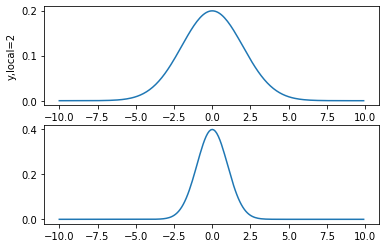

In [186]:
# Use this cell to plot the pdf associated with the gaussian distribution you have generated above
x = np.arange(-10,10,0.1)
g1_pdf = g1.pdf(x)
g2_pdf = g2.pdf(x)
f = plt.figure()
ax1 = f.add_subplot(2,1,1)
ax2 = f.add_subplot(2,1,2)
ax1.plot(x, g1_pdf)
ax1.set_ylabel('y,local=2')
ax2.plot(x, g2_pdf)

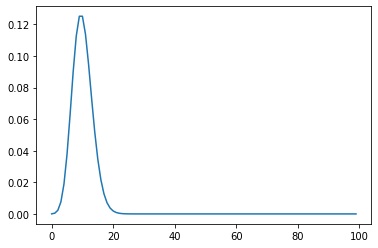

In [187]:
# Let's now do it for a probability mass function 
pois = scipy.stats.poisson(10)#10 is mean (miu)
k=np.arange(100) #k is variable x
pois_pmf = pois.pmf(k)
plt.plot(k, pois_pmf)

Other properties of the object (mean, std, moments, ...) can be calculated as we will see later. It is also possible to draw a random sample that follows the distribution we want to use using `scipy.stats.distribution.rvs()`:
``` python
# Generate a sample of 1000 points drawn from a gaussian distrib:
g_sample = g.rvs(1000)  

# Generate a sample of 10 points drawn from a poisson distrib:
pois_sample = pois.rvf(10) 
```

See Sect. 3.2 of our reference [book](#book) for an overview of the main distributions implemented in scipy. 

**Exercises:** 

- Generate a random sample of n points drawn from the gaussian distribution you defined above. (compare n=10, 100, 1000)
- Plot an histogram with the sample of points you have generated. 
- Plot a canonical gaussian pdf (width =1) and overplot an horizontal line showing its FWHM. 
- Print at the screen the value of the FWHM and compare the value you expect for a canonical 1D-gaussian (FWHM $= 2 * \sqrt{2 * \ln(2)} * \sigma $) 

TIP: Keep the value of the FWHM of a Gaussian in mind, you may have to use it often. 

In [188]:
# Use this cell to generate a random sample of points drawn from the gaussian distribution you defined above
g10_sample = g.rvs(10)
g100_sample = g.rvs(100)  
g1000_sample = g.rvs(1000)  

In [189]:
g#g = scipy.stats.norm(0, 2)

In [190]:
g10_sample

array([ 0.96862431,  1.15828096, -0.36316515,  2.82040926, -0.74894338,
        0.55039663, -1.92150922,  0.75385395,  0.06687786,  1.36113449])

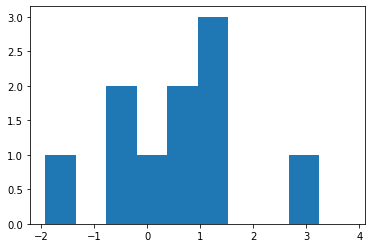

In [194]:
# ploting the histogram 
g10_hitValue=plt.hist(g10_sample,range=[g10_sample.min(), g10_sample.max()+1])

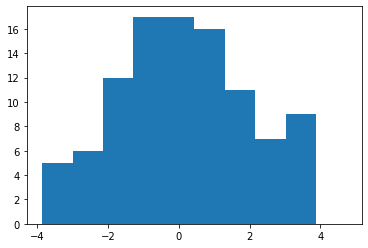

In [195]:
g100_hitValue=plt.hist(g100_sample,range=[g100_sample.min(), g100_sample.max()+1])

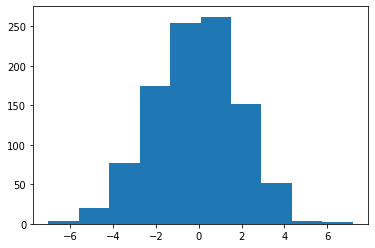

In [196]:
g1000_hitValue=plt.hist(g1000_sample,range=[g1000_sample.min(), g1000_sample.max()+1])

In [201]:
np.log(2)

0.6931471805599453

2.3548200450309493


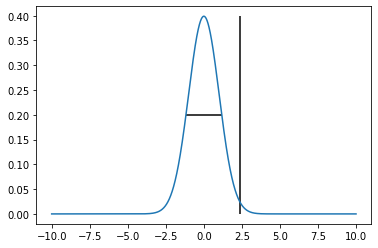

In [216]:
# Illustration of a canonical gaussian pdf and overplot of a line showing its FWHM 
g = stats.norm(0, 1)#canonical gaussian function
x = np.arange(-10,10,0.001)
g_pdf = g.pdf(x)
fwhm = 2*np.sqrt(2*np.log(2))
print(fwhm)
f = plt.figure()
ax = f.add_subplot(1,1,1)
ax.plot(x,g_pdf)
plt.vlines(fwhm,-g_pdf.min(),g_pdf.max())
id_max = g_pdf.argmax()
left_id = np.searchsorted(g_pdf,g_pdf.max()/2)
right_id = id_max + (id_max - left_id)
plt.hlines(g_pdf.max()/2,x[left_id],x[right_id])


### I.4b pdf, conditional probability and Bayes rule for bivariate distributions:  <a class="anchor" id="bivariate"></a>

This section (I.4b) is *not* mandatory for the course SPAT0002. It is provided for completeness. 

When we have 2 *continuous random variables*, we can write: 
    
$$
p(x,y) = p(x\,|\,y) \, p(y) = p(y\,|\,x) \, p(x)
$$

Such a distribution of 2 random variable is called a **bivariate distribution**. 

The *marginal probability* $p(x)$ (resp $p(y)$) is obtained by integrating $p(x, y)$ over all the probabilities to have obtained $y$ (resp $x$): 

$$
p(x) = \int p(x,y) \, {\rm d}y 
$$
$$
p(y) = \int p(x,y) \, {\rm d}x
$$

Hence, we have: 

$$
p(x)= \int p(x\,|\,y) \, p(y)  \, {\rm d}y
$$

$$
p(y\,|\,x) = \frac{p(x\, | \, y) \, p(y)}{p(x)} = \frac{p(x\, | \, y) \, p(y)}{\int p(x\,|\,y) \, p(y)  \, {\rm d}y}  
$$

For a non continuous variable (let's say ${y_j}$ with $j=1, ..., M$), the integral becomes a sum:

$$
p(y_j\,|\,x) = \frac{p(x\, | \, y_j) \, p(y_j)}{p(x)} = \frac{p(x\, | \, y_j) \, p(y_j)}{\sum_{j=1}^M \, p(x\,|\,y_j) \, p(y_j) }  
$$

For bi-(multi-)variate distributions, $p(x,y)$, one also defines the **covariance** (assume $<x>\,=\,<y>\,=\,0$):

$$
Cov(x,y) = <xy> = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty} x y\,p(x,y) \rm{d}x\rm{d}y
$$

We can also define a dimensionless **correlation coefficient** (assuming zero mean): 

$$
r = \frac{<xy>}{\sqrt{<x^2><y^2>}} . 
$$

if $r = 1$ ($r = -1$) the two RV are (anti-)correlated, and independent if $r=0$. 

#### Example

Use of `scipy.stats.multivariate_normal()` for a multivariate gaussian distribution 

In [221]:
step = 0.01
x, y = np.arange(-4.,4.,step), np.arange(-4,4.,step)
X, Y = np.meshgrid(x,y)
# X, Y = np.mgrid[-4:4:.01, -4:4:.01]    # Alternative command to generate a meshgrid!
# I now create a 3D array containing the X and Y coordinates
pos = np.zeros(X.shape + (2,))   
pos[:, :, 0] = X
pos[:, :, 1] = Y
X.shape

(800, 800)

Text(0.5, 1.0, '$p(y | x =2.00 )$')

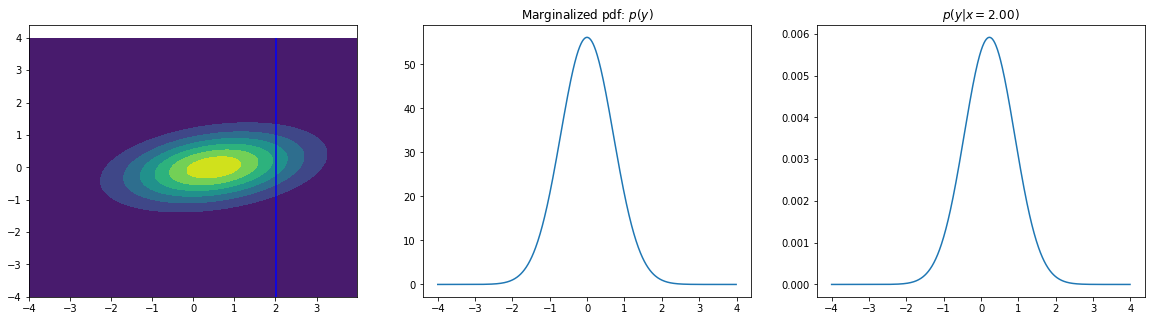

In [223]:
step = 0.01
x, y = np.arange(-4.,4.,step), np.arange(-4,4.,step)
X, Y = np.meshgrid(x,y)
# X, Y = np.mgrid[-4:4:.01, -4:4:.01]    # Alternative command to generate a meshgrid!
# I now create a 3D array containing the X and Y coordinates
pos = np.zeros(X.shape + (2,))   
pos[:, :, 0] = X
pos[:, :, 1] = Y
# define xid: index of xarray for which I want to know the conditional pdf p(y | x)
xid = 600
# Non isotropic bivariate distribution
n_2d = scipy.stats.multivariate_normal(mean=[0.5, 0.], cov=[[2.0, 0.3], [0.3, 0.5]])
f, ax = plt.subplots(figsize=(20,5), ncols=3)
ax[0].contourf(X, Y, n_2d.pdf(pos))
ax[0].vlines(x[xid]-step/2., -4, 4, color='red')
ax[0].vlines(x[xid]+step/2., -4, 4, color='blue')
# Calculates the marginalised pdf
ax[1].plot(y, n_2d.pdf(pos).sum(axis=1))  # I sum over the x axis 
ax[1].set_title('Marginalized pdf: $p(y)$')
# Plot p(y | x=xval)
ax[2].plot(y, n_2d.pdf(pos)[:, xid]   / n_2d.pdf(pos).sum(axis=0)[xid]) # Note the renormalisation by p(x) at x=xid
ax[2].set_title('$p(y | x =%.2f )$'%x[xid])

### I.5 What is a cumulative density function ? 


The *integral of a pdf* is called **cumulative density function**. 
$$
p(X \leq x) = H(x) = \int_{-\infty}^{x}\, h(x') \, {\rm d}x'
$$

Hence, the CDF if basically the function $H_X(x)$ we have defined in the first place to introduce the pdf. 

Obviously/by definition, we have that the integral of H(x) (i.e. between $-\infty$ and $+\infty$) is equal to 1.   

Let's visualise the CDF $H(x_0) = p(X \leq x_0)$, in the case of a gaussian PDF. We see that this is the area below the PDF between $-\infty$ and $x_0$.    

Text(-1.6,0.1,'$H(x_0) = p(X \\leq x_0)$')

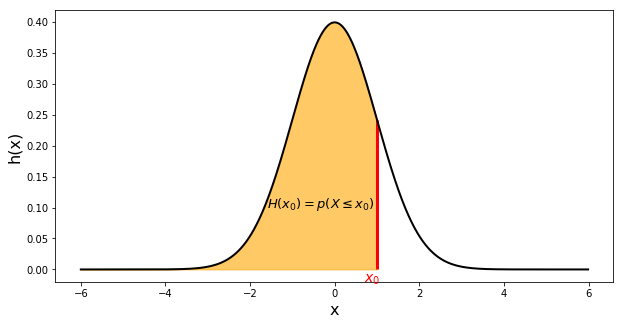

In [39]:
x = np.arange(-6,6,0.01)
x0 = 1.   # let's take x0 = 1 
id_x0 = np.searchsorted(x, x0)
g = scipy.stats.norm(loc=0, scale=1)
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
ax.plot(x, g.pdf(x), color='black', lw=2)
ax.vlines(x0, 0, g.pdf(x0), color='red', lw=3)
ax.fill_between(x[:id_x0], 0, g.pdf(x[:id_x0]), color='orange', alpha=0.6)
ax.set_ylabel('h(x)', size=16)
ax.set_xlabel('x', size=16)
ax.text(0.7, -0.02, r'$x_0$', size=14, color='red')
ax.text(-1.6, 0.1, r'$H(x_0) = p(X \leq x_0)$', size=13)

The CDF provides a direct way to calculate the probability for the value of a random variable $X$ to be between 2 values $x_1$ and $x_2$. If $x_1 < x_2$, then $P(x_1 < X < x_2) = H(x_2) - H(x_1)$. On the above figure, this would be the difference of area up to $x_2$ minus the area up to $x_1$.   

Hence, you know how to derive the *p% quantile* of a distribution. $q_p$ defined as:

$$
\frac{p}{100} = \int_{-\infty}^{q_p} h(x) dx
$$

$q_{25}$, $q_{50}$ and $q_{75}$ are commonly called the first, second and third *quartile* or 25 / 50 / 75 *percentile* of the distribution. $q_{75} - q_{25}$ is called *interquartile range* and provides a robust estimate of the width of a distribution. By definition, the *interquartile range* contains 50% of the surface behind the CDF / PDF and hence 0.5 of the probability (centered on the median). We will see later how to use percentiles to calculate confidence intervals. 

Note that *lowercase* letters are used for probability density (differential distribution) functions (pdf), and upper case for their cumulative counterpart (CDF).

**Example**:

An important CDF is the one of the gaussian distribution:

$$
H(x\,|\,\mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} ~ \int_{-\infty}^{x} \exp \left( -\frac{1}{2}\frac{(x'-\mu)^2}{\sigma^2}\right) {\rm d}x'. 
$$

This function is generally evaluated in terms of what is called the *Gauss error function* :   
$$
\rm{erf}(z) = \frac{2}{\sqrt{\pi}}~\int_0^z \exp(-t^2)\,{\rm{d}}t.
$$

This function can be evaluated using `scipy.special.erf()`. 

Using the error function, the CDF of a Gaussian distribution can be re-written:

$$
H(x\,|\,\mu, \sigma) = \frac{1}{2}~\left( 1 \pm erf \left( \frac{|x-\mu|}{\sqrt{2}\sigma} \right)  \right),
$$

with "+" sign if $x > \mu$, and "-" sign if $x<\mu$. 

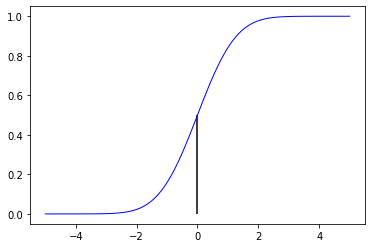

In [224]:
# CDF of a gaussian
f, ax = plt.subplots(nrows=1)
n = scipy.stats.norm(0, 1)
x=np.linspace(-5,5, 100)
g_cdf = n.cdf(x)
ax.plot(x, g_cdf, lw=1, color="blue")
ax.vlines(0, 0,0.5)

*How to read up the percentile / probability from the CDF in python ?*

If you want to know for which value of $x$ we have a given probability/percentile, you may use the "percent point function" or `ppf` (i.e. the inverse of the `cdf`). To know for which $x$ one gets a specific $q$ ($0 < q < 1$), you may use the command: `scipy.stats.distrib.ppf(q)`  (replace `distrib` by the name of the distribution you are interested in). 

**Exercise:**

- Use `ppf` to calculate the interquartile range $q_{75}− q_{25}$ for a Gaussian/Normal distribution   

- Bonus: From the above definition, it is clear that:

$$
p(a < x < b\,| \,\mu, \sigma) = P(b \, | \,\mu, \sigma)-P(a \,| \, \mu, \sigma)
$$

Derive the probability that $p(\mu - M\,\sigma < x < \mu + M \, \sigma)$ for M = 1, 2, 3 and calculates its values with `scipy`. 


-0.6744897501960817


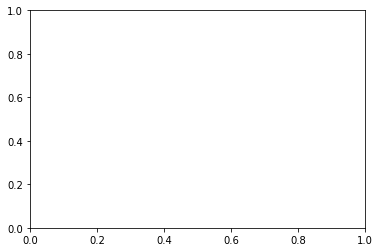

In [235]:
# Answer
f, ax = plt.subplots(nrows=1)
n = scipy.stats.norm(0, 1)
x=np.linspace(-5,5, 100)
g_ppf = n.ppf(0.25)
print(g_ppf)
#ax.plot(x, g_ppf, lw=1, color="blue")

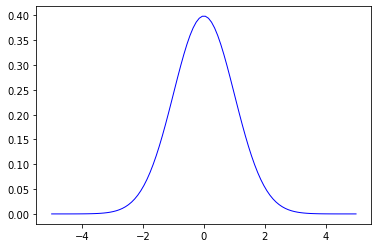

In [232]:
g_pdf = n.pdf(x)
f, ax = plt.subplots(nrows=1)
ax.plot(x, g_pdf, lw=1, color="blue")

In [230]:
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

## Intermezo: Descriptive statistics

This section is *not* mandatory if you fulfill the prerequisite for this course. However, if you do not feel confortable with the concepts we have reviewed above, consider runing the following notebooks:     

- To review the **properties of probability distribution functions** (mean, standard deviation, variance, skewness, ...), go to the notebook [Descriptive_statistics_01.ipynb](Descriptive_statistics_01.ipynb).    

- To **better understand visually the link between PDF and CDF**, and do an interactive tour of the characteristics and properties of **common distributions** encountered in science, then, run the Notebook [Descriptive_statistics_02.ipynb](Descriptive_statistics_02.ipynb). 

## Summary 

We have reviewed basic statistical concepts and quantities, and how to use them in python. In particular: 
- basic probability concepts: a sample, an event, a realisation, a conditional probability (i.e. $p(A|B)$ is probability of $A$ given $B$). 
- the probability combination rules. 
- what is a**random variable** (this is a key concept!), and how to generate and manipulate random variable with numpy: `np.random.rand()`, `np.random.seed(value)`, `np.random.randint()`, `np.random.permutation()`
- Probability density function (pdf) and Cumulative density function (CDF) (You *need* to understand what are these functions very well !)
- How to manipulate distributions with `scipy.stats`. For example, to work with a gaussian, and subsequently calculate pdf, cdf, ... drawn from a gaussian distribution, : `g = scipy.stats.norm()` followed by `g.pdf(x)` to get a pdf sampled for values x (single value or array), `g.cdf(x)` for the cdf(), ...
- How to calculate an interquartile range based on the cdf of a function, using the inverse of a cdf, the ppf of percent point function (`scipy.stats.mydistribution.ppf()`). 
- Use `scipy.special()` to calculate special function, in particular `scipy.special.erf()` which is the Gauss error function.  

## X. References and supplementary material: <a class="anchor" id="X"></a>

* **Chapter 1** (1.2), **Chapter 3** (3.1, 3.2) and **Chapter 4** (4.1 to 4.3) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* Youtube video about Random variable and PDF: https://www.youtube.com/watch?v=9KVR1hJ8SxI : First 7 minutes
* Youtube video about CDF and its link to PDF: https://www.youtube.com/watch?v=4BswLMKgXzU : First 6 minutes

* *All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/).  

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 2**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**, **Chapter 18.7** 

